Vamos a sacar el proceso SLE de una fuente externa. Este retorna los vectores $xvalues$ y $yvalues$.

----------------------------------------

Acá empieza el trabajo propio. Primero, vamos a definir varias funciones

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


# Find the index of the Ly parameter
def Ly_index(ydata):
    maxpos = ydata.index(max(ydata))
    return maxpos


# Find the Ly parameter
def Ly_value(ydata):
    return max(ydata)

    
# Find the alpha_i between 3 vectors
def angle_alpha_i(x1,x2,x3,y1,y2,y3):
    
    def slope():
        m1 = (y2-y1)/(x2-x1)
        m2 = (y3-y2)/(x3-x2)
        return m1, m2
    
    v1 = np.array([x2-x1,y2-y1])
    v2 = np.array([x3-x2,y3-y2])
    xx1, yy1 = v1
    xx2, yy2 = v2
    
    inner_product = xx1*xx2 + yy1*yy2
    len1 = math.hypot(xx1, yy1)
    len2 = math.hypot(xx2, yy2)
    theta = math.acos(inner_product/(len1*len2)) 
    m1, m2 = slope()
    
    if (y2 > y1) and (x2 > x3):
        theta = -theta 
    
    elif (y1 > y2) and (x3 > x2):
        theta = -theta
    
    elif (y1 == y2):
        if (y2 > y3) and (x1 > x2):
            theta = -theta
        if (y3 > y2) and (x2 > x1):
            theta = -theta
    elif (m2 > m1) and (m1 > 0):
        theta = -theta

    return theta



# Find the winding angle for all datapoints
def winding_angle(xdata, ydata):
    n = len(xdata)
    angles = np.zeros(n-1)
    angles[0] = 0
    if (xdata[1]-xdata[0])!=0:
        angles[0] = math.pi/2 - math.atan((ydata[1]-ydata[0])/(np.abs(xdata[1]-xdata[0])))
        if (xdata[1]<0):
            angles[0] *= -1
        
    for ii in range (1, n-1):
        alpha_i = angle_alpha_i(xdata[ii-1], xdata[ii], xdata[ii+1],
                               ydata[ii-1], ydata[ii], ydata[ii+1])
        angles[ii] = angles[ii-1] + alpha_i
        #angles[ii] = alpha_i
    
    return angles
    


# Find the average of the squares of a vector
# <theta**2> 
def average_squares(vector):
    n = len(vector)
    suma = 0
    for ii in range (n):
        suma += (vector[ii]**2)
    return suma/(n)


# Trick to not simulate over and over
# Sebas dice que no sirve xd
def portion(cte, xdata, ydata):
    n = len(xdata)
    xdata = xdata[0: int(cte*n): 1]
    ydata = ydata[0: int(cte*n): 1]
    return xdata, ydata


#portion = 50000
portion = 30


# Plot a given curve
def plot_curve(dataframe):
    plt.plot(dataframe["z_real"].to_numpy()[:portion:], dataframe["z_imag"].to_numpy()[:portion:])
    plt.show()


THETA2 = []
LY2 = []


def plot_gaussian(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[:portion:], dataframe["z_imag"].to_numpy()[:portion:])
    plt.hist(angles)
    plt.show()


def find_data(dataframe):
    angles = winding_angle(dataframe["z_real"].to_numpy()[:portion:], dataframe["z_imag"].to_numpy()[:portion:])
    THETA2.append(np.var(angles)) 
    LY2.append(Ly_value(dataframe["z_imag"].to_numpy()))
    return angles

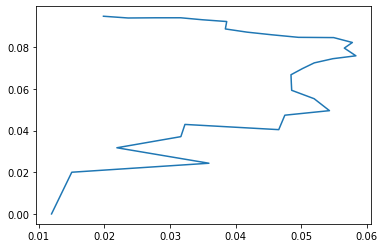

[ 0.15298984  1.36730366 -1.08407922  1.07029088  0.10621041  1.7440261
  0.13326387  1.26123965 -0.38694688 -0.70452697 -1.39370472 -1.39639358
 -0.8496424  -0.80213254 -0.42812799 -0.18874621 -1.82919576 -0.95570957
 -2.26522218 -2.93204482 -3.20327448 -3.23279325 -3.34413278 -2.14967867
 -3.55353983 -3.60913815 -3.89220276 -3.91287914 -3.67080794]


In [4]:
T10 = pd.read_csv("Data_WA/final_curve_values_t= 1.0.csv")
T10
plot_curve(T10)
angles10 = find_data(T10)
#plot_gaussian(T10)
print (angles10)

[1.919291756151808]
[4.034315849990754]


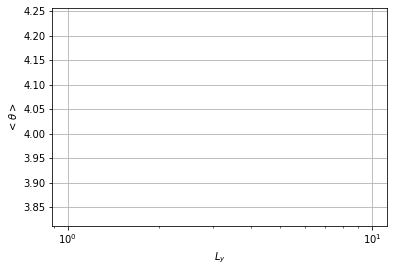

In [113]:
print (LY2)
print (THETA2)

plt.plot(LY2, THETA2)
plt.xlabel(r'$L_y$')
plt.ylabel(r'$<\theta>$')
plt.xscale('log')
plt.grid()
plt.show()

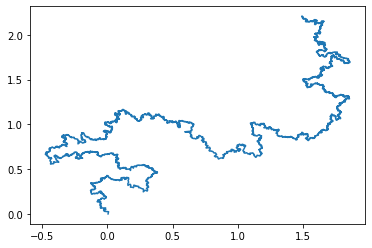

In [57]:
T15 = pd.read_csv("Data_WA/final_curve_values_t= 1.5.csv")
T15
plot_curve(T15)
find_data(T15)

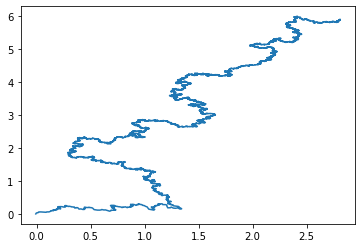

In [47]:
T100 = pd.read_csv("Data_WA/final_curve_values_t= 10.0.csv")
T100
plot_curve(T100)
find_data(T100)

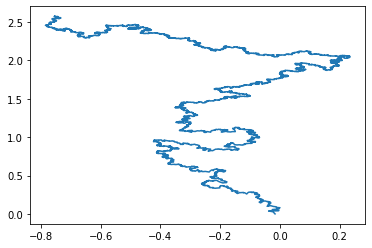

In [58]:
T20 = pd.read_csv("Data_WA/final_curve_values_t= 2.0.csv")
T20
plot_curve(T20)
find_data(T20)

In [31]:
angles = winding_angle(xvalues, yvalues)
average_theta2 = average_squares(angles)
Ly = Ly_value(yvalues)
print (Ly, average_theta2)

NameError: name 'xvalues' is not defined

In [49]:
delta = 0.01
XX = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]
YY = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]|

In [132]:
XX = [0, 2, 3]
YY = [0, 1, 3]

In [50]:
XX = [0, 0+delta, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta]
YY = [0, 1, 1+delta, 2, 2+delta, 3, 3+delta, 4, 4+delta, 5]


3 0.7203736943226312
[1.10714872 0.46364761]


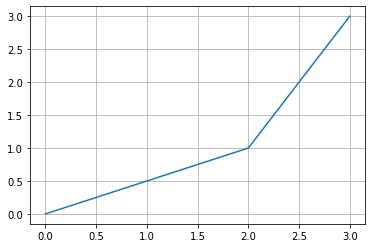

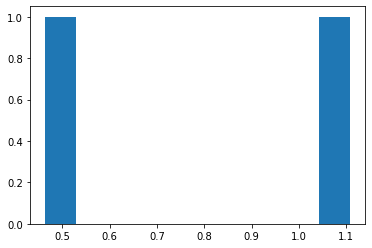

In [143]:
prueba_angles = winding_angle(XX, YY)
prueba_average_theta2 = average_squares(prueba_angles)
prueba_Ly = Ly_value(YY)
print (prueba_Ly, prueba_average_theta2)
print (prueba_angles)
plt.plot(XX, YY)
plt.grid()
plt.show()

plt.hist(prueba_angles)
plt.show()